## Lazy loading and basic Parallelism




Let us first open a single high-res CESM model output file, containing 1 time step, using xarray. Notice the additional chunks argument to the open_dataset function  


In [1]:
import xarray as xr
filename='/scratch/training/intro_pangeo/datasets/B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013/ocn/hist/B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.nday1.2021-01-01.nc'
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 31, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 2021-01-02 00:00:00 ... 2021-02-01 00:0...
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/75)
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    ...                  ...
    LWUP_F              (time, nlat, nlon) float32 ...
    LWDN_F              (time, nlat, nlon) float32 ...
    MELTH_F             (time, nlat, nlon) float32 ...
    QFLUX               (time, nlat, nlon) float32 ...
    HMXL                (time, nlat, nlon) float32 ...
    XMXL                (time, nlat, nlon) float32 ...
Attributes:
    title:           B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-12-10 at 22:26:48.3
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    16171571
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0

In [2]:
%%time
ds.TAUX.mean()

CPU times: user 9.43 s, sys: 2.04 s, total: 11.5 s
Wall time: 11.9 s


<xarray.DataArray 'TAUY' ()>
array(-0.39417478, dtype=float32)

In [6]:
ds.close()
ds = xr.open_dataset(filename, chunks={'nlat':1200,'nlon':1800})
ds

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 31, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 2021-01-02 00:00:00 ... 2021-02-01 00:0...
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    ULAT                (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/75)
    time_bound          (time, d2) object dask.array<chunksize=(31, 2), meta=np.ndarray>
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    KMU                 (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    REGION_MASK         (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    ...                  ...
    LWUP_F              (time, nlat, nlon) float32 dask.array<chunksize=(31, 1200, 1800), meta=np.ndarray>
    LWDN_F              (time, nlat, nlon) float32 dask.array<chunksize=(31, 1200, 1800), meta=np.ndarray>
    MELTH_F             (time, nlat, nlon) float32 dask.array<chunksize=(31, 1200, 1800), meta=np.ndarray>
    QFLUX               (time, nlat, nlon) float32 dask.array<chunksize=(31, 1200, 1800), meta=np.ndarray>
    HMXL                (time, nlat, nlon) float32 dask.array<chunksize=(31, 1200, 1800), meta=np.ndarray>
    XMXL                (time, nlat, nlon) float32 dask.array<chunksize=(31, 1200, 1800), meta=np.ndarray>
Attributes:
    title:           B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-12-10 at 22:26:48.3
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    16171571
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0

Let's look at the structure of the TEMP field

In [8]:
ds.SST

<xarray.DataArray 'SST' (time: 31, nlat: 2400, nlon: 3600)>
dask.array<open_dataset-4f4920aa5222f07d5dd6469255ee3eddSST, shape=(31, 2400, 3600), dtype=float32, chunksize=(31, 1200, 1800), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2021-01-02 00:00:00 ... 2021-02-01 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Surface Potential Temperature
    units:         degC
    grid_loc:      2110
    cell_methods:  time: mean

Notice how different this *temp* field is compared to the previous method. The data in ds.temp is no longer a simple numpy.ndarray, but it is instead split into 36 chunks of size (1, 62, 400, 600) each. When using dask, the open_dataset operation does not immediately load data from the file into memory. Instead, dask delays the loading of data to when absolutely necessary. More on this later.

In [9]:
ds.SST.nbytes/1e9

The most important aspect of this *temp* field is that much of the data that xarray 'sees' at this point only exists on disk storage and is not actually loaded into the memory (RAM). At this stage, xarray/dask is only aware of a basic amount of information enough to start performing tasks on the dataset. Dask automatically loads data according to the chunk size from disk storage into RAM as required for each computation. This is known as *lazy loading*. This is unlike the previous method (without the explicit chunks argument), which would load the entire file(s) into memory. 

**A huge advantage of lazy loading is that we can potentially invoke computations on entire high-resolution datasets that far exceed the amount of memory available to us.**






In [4]:
%%time
average = ds.TAUX.mean()

CPU times: user 7.37 ms, sys: 1.08 ms, total: 8.45 ms
Wall time: 7.92 ms


<xarray.DataArray 'TAUY' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

Note how the above operation finishes in the order of milliseconds. However, the above command did not actually compute the mean. It has only generated the task graphs at this point. To actually force the computation, do

In [7]:
%%time
average.compute()


CPU times: user 14.7 s, sys: 2.28 s, total: 16.9 s
Wall time: 14 s


<xarray.DataArray 'TAUY' ()>
array(-0.39417484, dtype=float32)

The *compute()* operation forces dask to compute all the pending tasks and return the result to the jupyter notebook or python script from which it is called. In this case, the memory available to the notebook and the dask workers are exactly the same. We will also see examples where the dask workers are running on vasly bigger computational resources compared to the jupyter notebook. In such cases, calling compute() without careful forethough could potentially lead to the notebook running out of memory and crashing. 

When ds.mean is called, dask first partitions this mean operation into a series of small tasks to operate on each chunk. It will be useful to take a look at the task graph generated by dask.

## Dask Arrays

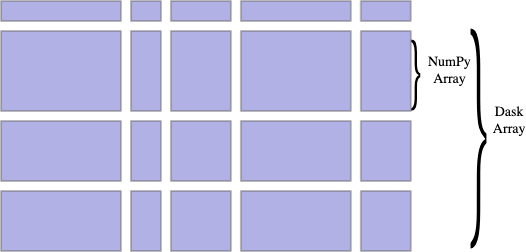
 _source:
[Dask Array Documentation](http://dask.pydata.org/en/latest/array-overview.html)_

Dask array provides a parallel, larger-than-memory, n-dimensional array using blocked algorithms. Simply put: distributed Numpy.

*  **Parallel**: Uses all of the cores on your computer
*  **Larger-than-memory**:  Lets you work on datasets that are larger than your available memory by breaking up your array into many small pieces, operating on those pieces in an order that minimizes the memory footprint of your computation, and effectively streaming data from disk.
*  **Blocked Algorithms**:  Perform large computations by performing many smaller computations

In [3]:
import xarray as xr
from glob import glob

files = glob('/scratch/training/intro_pangeo/datasets/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002/ocn/hist\
/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002.pop.h.0035-??.nc')
files.sort()
ds = xr.open_mfdataset(files)
ds.SALT

<xarray.DataArray 'SALT' (time: 12, z_t: 60, nlat: 384, nlon: 320)>
dask.array<concatenate, shape=(12, 60, 384, 320), dtype=float32, chunksize=(1, 60, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0035-01-17 00:00:00 ... 0035-12-17 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Salinity
    units:         gram/kilogram
    grid_loc:      3111
    cell_methods:  time: mean

In [2]:
%%time
ds.SALT.mean(dim=['z_t','time']).compute()

CPU times: user 922 ms, sys: 441 ms, total: 1.36 s
Wall time: 3.02 s


/scratch/training/intro_pangeo/conda/envs/training/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'SALT' (nlat: 384, nlon: 320)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [34.42658, 34.42467, 34.42275, ...,      nan,      nan,      nan],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
Dimensions without coordinates: nlat, nlon

### Choosing a chunk size

Now that we have a basic idea of how dask enables parallel computation, it is important to revisit chunking. 

The choice of chunk sizes is crucial to getting your tasks to execute without running out of memory. Dask developers suggest the following considerations when choosing a chunk size: 

**1. A chunk should be small enough to fit comfortably in memory, but large enough that computations on that chunk take significantly longer than the 1ms overhead per task that Dask scheduling incurs.**

Typically, we have many chunks in memory at one instance, ranging anywhere between 10MB-1GB per chunk, depending on how much memory you have available, and the cost of each computation. 

**2. Chunks should align with the computation that you want to do.**

For example, if you want to vertically-average the temperature field, try to include all the vertical levels in each chunk. Otherwise, there is an additional cost of merging the results of computation from the two chunks. This is also true for vertical interpolation.

As an extreme example, let us say we want to perform a curve fit on the entire timeseries (0,999) of SST at one (lat,lon) point, and the chunk size is (time=1,z_t=61,nlat=400,nlon=600). Dask will try to load all 1000 chunks into a single worker, in order to try to compute the curve fit. Depending on the size of the dataset, dask and jupyterlab might run out of memory and crash.

**3. Chunks should align with your storage, if applicable.**

Array data formats are often chunked as well. When loading or saving data, if is useful to have Dask array chunks that are aligned with the chunking of your storage, often an even multiple times larger in each direction.



See https://docs.dask.org/en/latest/array-chunks.html for more details on specifying chunk sizes. 